This notebook is to document the implementation of cold deciduous only vegetation in FATES.

The runs here use two identical PFTs cloned from the "broadleaf_colddecid_extratrop_tree" in the default FATES file. (PFT#6) 

I noticed previously that there were some odd issues with this PFT dominating the tropical regions, and so wanted to see how they would behave in the absence of any competitors... The answer, as usual for these sorts of things was 'interesting'. 

Hopefully this little story should at least point to a plausible set of solutions, (spoiler alert: I haven't figured it out yet.) 

So, in the beginning, we have some magic python libraries...

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we choose which simulations to use...

In [2]:
runs = ['clm5-fates_napi5_CLD']

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [4]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

Read data from the archive: (only first 10 years for sake of aforementioned slowness)

In [6]:
run = runs[0]
arc = scratch + 'archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' 
print(arc)
ds8 = xr.open_mfdataset(arc + '200*-*.nc', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher/archive/clm5-fates_napi5_CLD/lnd/hist/clm5-fates_napi5_CLD.clm2.h0.


Then plot a timeseries of the LAI of all global points

Text(0.5, 1.0, '')

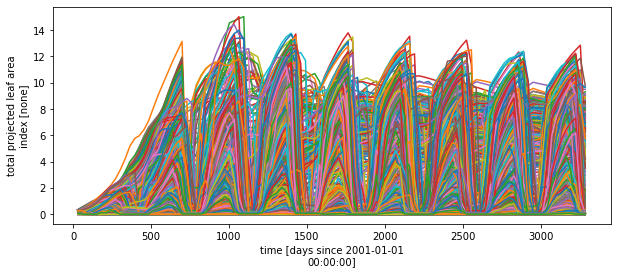

In [46]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(5, 40)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')

So far, so deciduous looking (in general)... Let's plot a map of phenology status in the last July of the run.

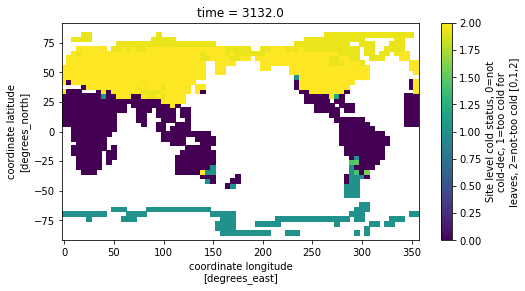

In [47]:
plt.rcParams['figure.figsize'] = [8, 4]
t=s=ds8.SITE_COLD_STATUS.sizes['time']-6
x = ds8.SITE_COLD_STATUS[t,:,:]
x.plot()

Tropics are mostly in '0' state, which means they are 'nevercold' and shouldn't have any leaves on, right? (2 is 'not_cold', 1 is 'is_cold')


https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L741

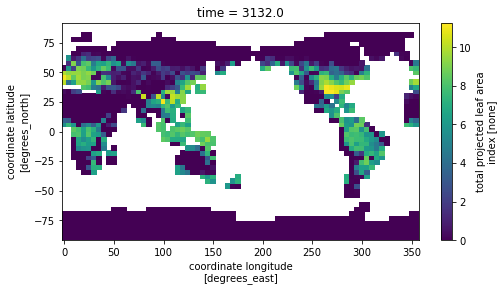

In [28]:
plt.rcParams['figure.figsize'] = [8, 4]
t=s=ds8.TLAI.sizes['time']-6
x = ds8.TLAI[t,:,:]
x.plot()

Err, but actually the points that should be 'nevercold' do have leaves on... 

So, how did we get there, from the beginning of the simulation? (plotting out only points in tropical band)

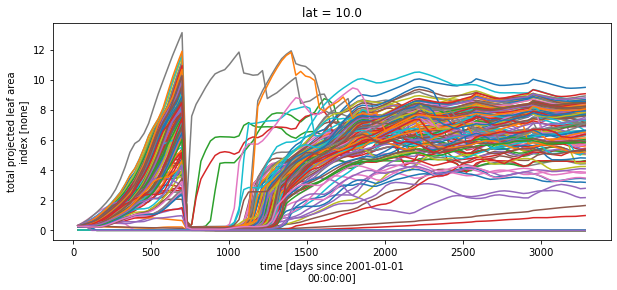

In [30]:
plt.rcParams['figure.figsize'] = [10,4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


So, leaves are on at the beginning, then eventually we determine that they are 'nevervold', and then they come off, but then they creep back on again after another year or so... Does the phenological status of those points evolve at the same time?

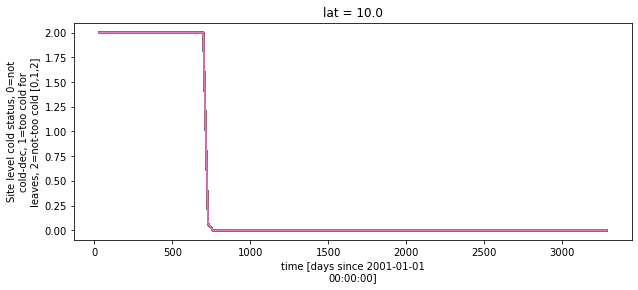

In [31]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_COLD_STATUS.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


No, none of these points goes back into the 'notcold' state (2). They all appear to stay in 'nevercold'

Thus, we do not seem to have actually triggered any of the climate triggers:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L698


Just for good measure, here is the "days since cold leaf off" counter, showing that we apparently only trigger this once

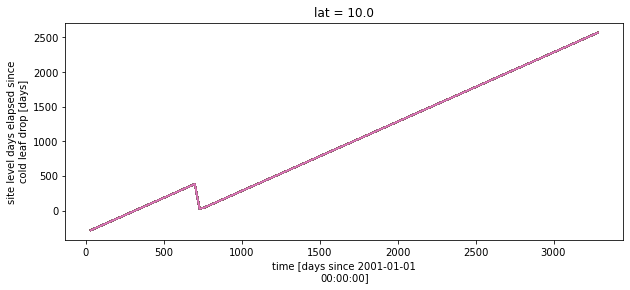

In [37]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


And here are "days since cold leaf on", which again, only happens once, indicating that the grid cell status is not 'officially; switching back to 'not cold'. e.g. 
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L803

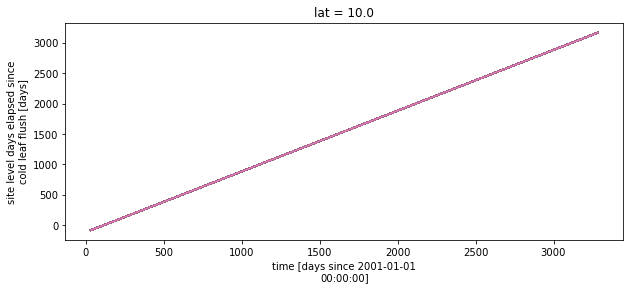

In [38]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_DAYSINCE_COLDLEAFON.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


Lets double check that all the PFTs are actually cold deciduous

In [42]:
pftfile='/glade/u/home/rfisher/python_scripts/fates_cld.nc'
pfts = xr.open_dataset(pftfile)
print(pfts. fates_phen_season_decid)
print(pfts. fates_phen_evergreen)

<xarray.DataArray 'fates_phen_season_decid' (fates_pft: 2)>
array([1., 1.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      logical flag
    long_name:  Binary flag for seasonal-deciduous leaf habit
<xarray.DataArray 'fates_phen_evergreen' (fates_pft: 2)>
array([0., 0.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      logical flag
    long_name:  Binary flag for evergreen leaf habit


...and also that they (there are two identical CLDs) are behaving as expected (is there a fix for the one-pft-crashes on the trunk yet?)

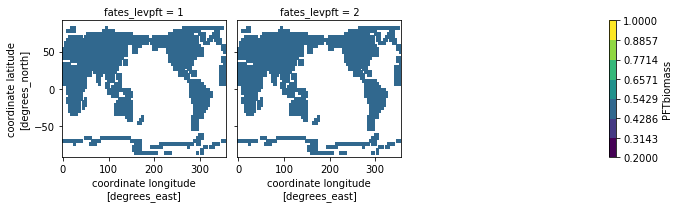

In [12]:
plt.rcParams['figure.figsize'] = [15, 15]
PFTbiomass = ds8.PFTbiomass[0,0:3,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8, vmin=0.2 , vmax = 1.0)
#plt.tight_layout()

So, maybe there are new recruits which are arriving 'under the radar' and have a cohort status with leaves_on?  

This is where cohortstatus gets defined in recruitment:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L1535

But this seems like it -should- be set to 'leaves_off' if we are in a 'nevercold' regime:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L1359

But what I don't understand is what happens with the new cohorts in PARTEH, particularly with regard to if and how parteh uses the status of the leaves during initialization?
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDCohortDynamicsMod.F90#L240